In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Part 1: Data Preprocessing

In [19]:
df = pd.read_csv("Netflix_Userbase.csv")

2. Handlimg missing values

In [20]:
print(df.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


3. Encode Categorical Variables

In [21]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['Monthly Revenue']=(df['Monthly Revenue']>10).astype(int)

4. Feature Selection

In [22]:
X = df_dummies.drop(['Monthly Revenue','Age'], axis=1)
y = df_dummies['Monthly Revenue']

Part 2: Exploratory Data Analysis (EDA)

1. Descriptive Statistics

In [23]:
print(X.describe())

          User ID  Subscription Type_Premium  Subscription Type_Standard  \
count  2500.00000                 2500.00000                 2500.000000   
mean   1250.50000                    0.29320                    0.307200   
std     721.83216                    0.45532                    0.461425   
min       1.00000                    0.00000                    0.000000   
25%     625.75000                    0.00000                    0.000000   
50%    1250.50000                    0.00000                    0.000000   
75%    1875.25000                    1.00000                    1.000000   
max    2500.00000                    1.00000                    1.000000   

       Join Date_01-05-23  Join Date_01-06-22  Join Date_01-07-22  \
count           2500.0000         2500.000000         2500.000000   
mean               0.0004            0.001200            0.007600   
std                0.0200            0.034627            0.086863   
min                0.0000            0.

2. Visualizations

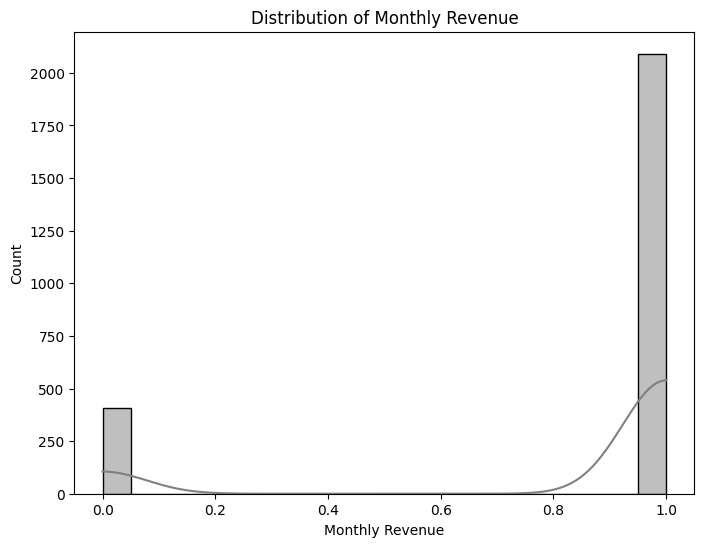

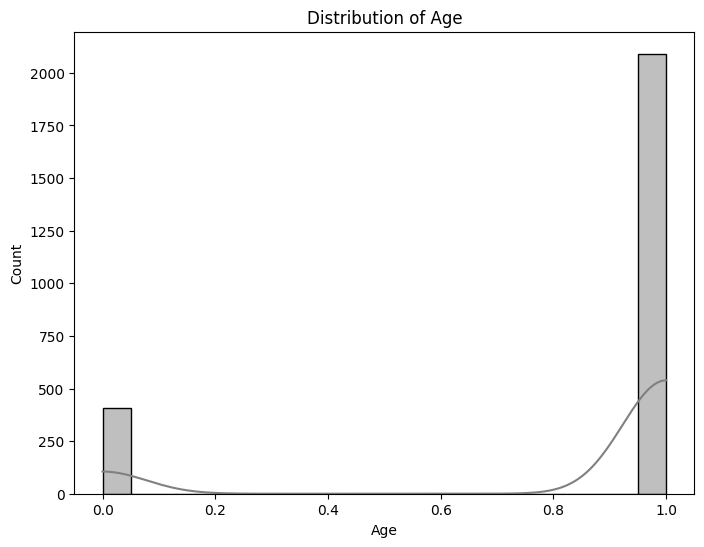

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df_dummies['Monthly Revenue'], bins=20, kde=True, color='gray')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_dummies['Monthly Revenue'], bins=20, kde=True, color='gray')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Part 3: Linear Regression Model (Predicting Monthly Revenue)

1. Build the Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr_model.predict(X_test)

2. Model Evaluation

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Linear Regression Model Evaluation:
Root Mean Squared Error (RMSE): 0.3998837643949078
R-squared (R2): -0.13328862527740704


Part 4: Logistic Regression Model (Predicting Customer Feedback)

1. Model Building

In [28]:
df_dummies['Feedback'] = (df_dummies['Monthly Revenue'] > df_dummies['Monthly Revenue'].mean()).astype(int)

X_logistic = df_dummies.drop(['Monthly Revenue', 'Feedback'], axis=1)
y_logistic = df_dummies['Feedback']

In [29]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

In [30]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred_logistic = logistic_model.predict(X_test_logistic)

2. Model Evaluation

In [32]:
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Model Evaluation:
Accuracy: 0.83
Precision: 0.83
Recall: 1.0
F1 Score: 0.9071038251366119
Confusion Matrix:
[[  0  85]
 [  0 415]]
